# |Census Income-DS2306-Sudhanshu Kumar Singh -20-11-2023|

In [1]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Loading the data 
data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/census_income.csv")

In [3]:
data.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11485,42,Private,334522,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7105,36,?,176458,HS-grad,9,Divorced,?,Unmarried,White,Female,0,0,28,United-States,<=50K
20714,33,Private,204829,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,45,United-States,<=50K
6929,31,Local-gov,50442,Some-college,10,Never-married,Adm-clerical,Own-child,Amer-Indian-Eskimo,Female,0,0,25,United-States,<=50K
418,34,State-gov,240283,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Female,0,0,40,United-States,<=50K
6712,48,Private,205424,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,40,United-States,>50K
12213,50,?,346014,7th-8th,4,Separated,?,Own-child,White,Female,0,0,20,United-States,<=50K
16417,39,Private,230329,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,Canada,>50K
19442,36,Local-gov,32587,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
2098,61,Self-emp-not-inc,115023,Masters,14,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,4,?,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
#Summary staistics of numrical couluns 
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
# To display all column names
print(data.columns)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [8]:
# Check for missing values 
print(data.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


# value counts for categorical columns

In [9]:
print(data['Native_country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [10]:
print(data['Sex'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


In [11]:
print(data['Race'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


In [12]:
print(data['Relationship'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


In [13]:
print(data['Sex'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


In [14]:
print(data['Education'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


In [15]:
print(data['Workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [16]:
print(data['Income'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


In [17]:
print(data['Marital_status'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [18]:
data.replace("?", pd.NA, inplace=True)

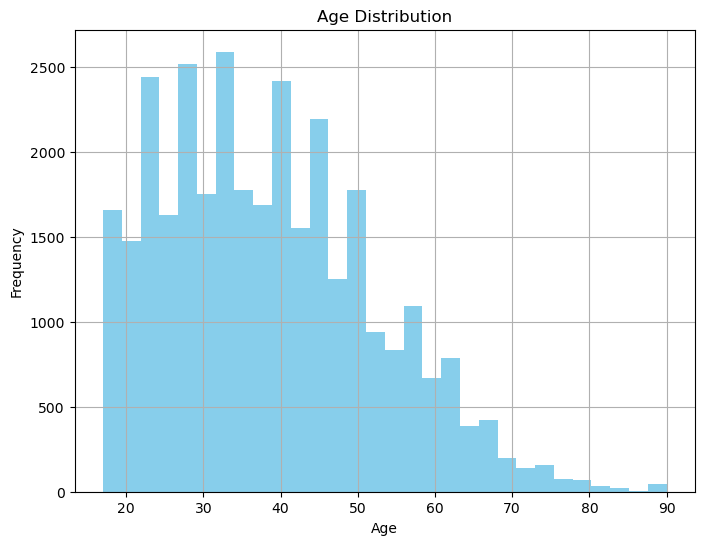

In [19]:
# Histogram of Age
plt.figure(figsize=(8, 6))
data['Age'].hist(bins=30, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

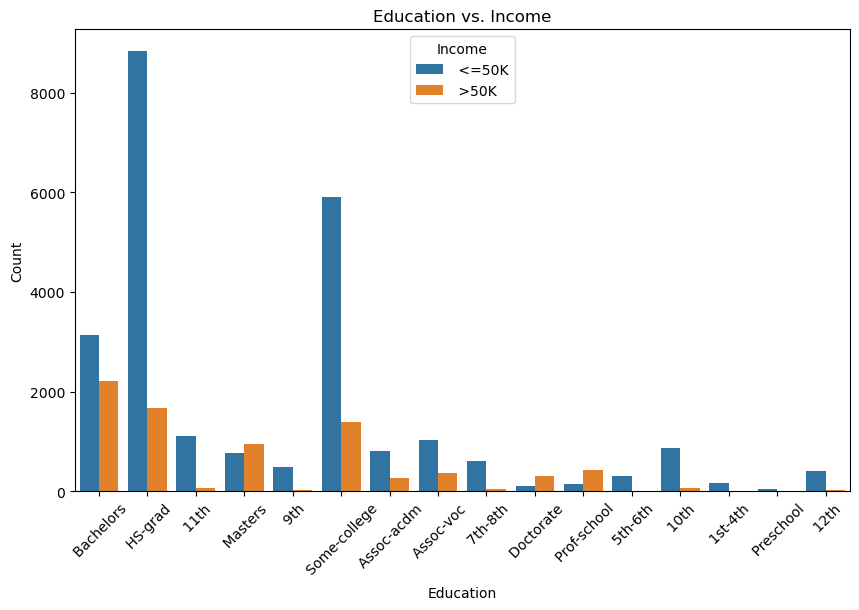

In [20]:
# Bar plot of Education vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Income', data=data)
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs. Income')
plt.show()

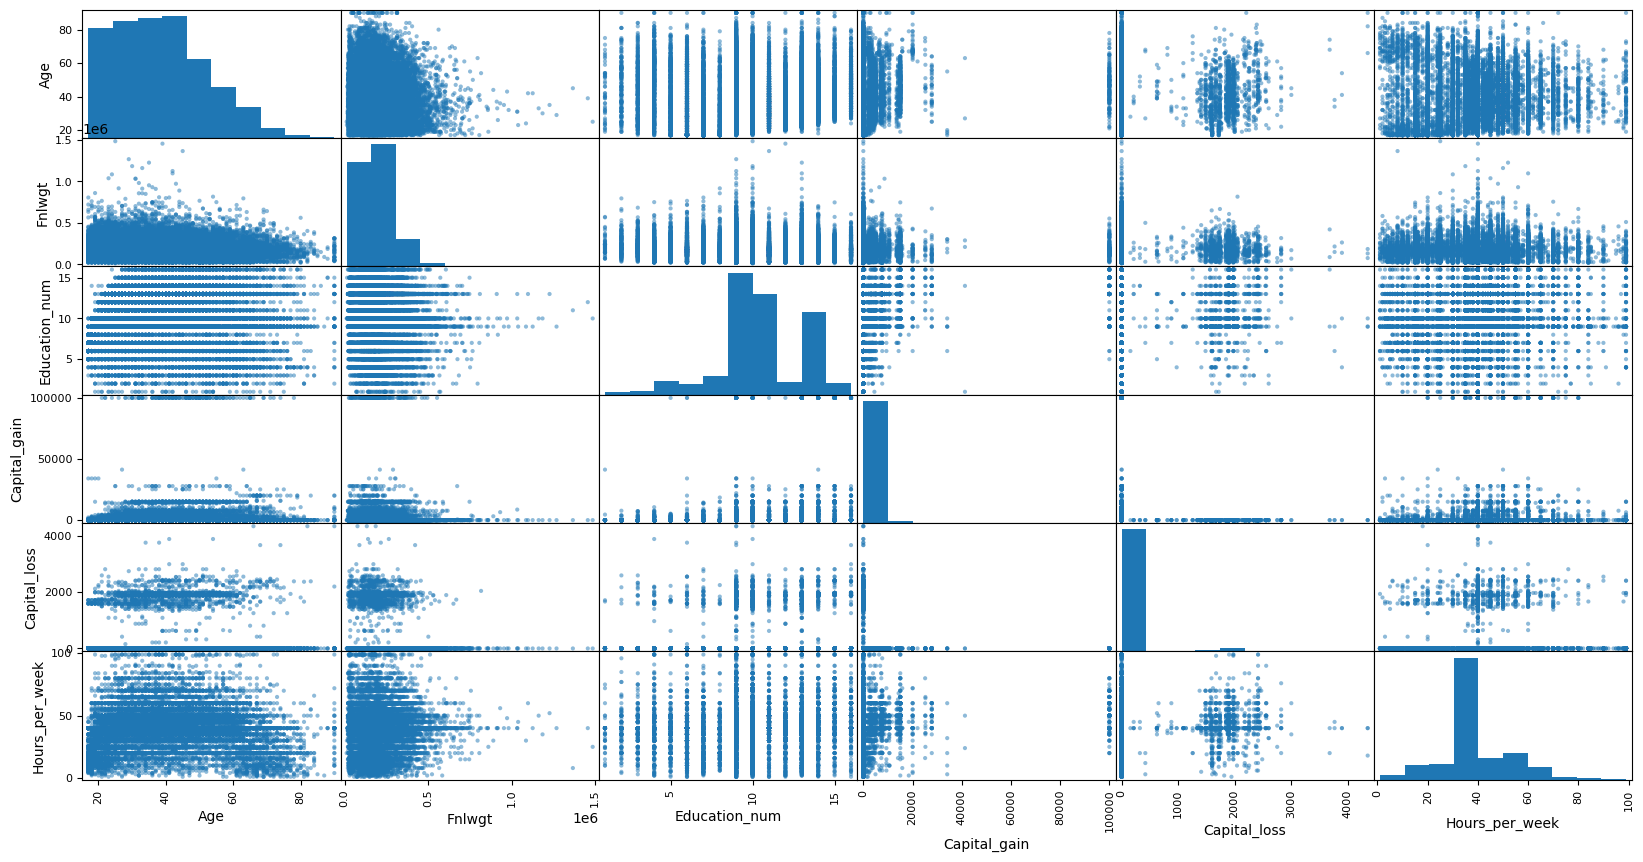

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize = (20,10))
plt.show()

In [22]:
# catogeriing the data in object and numbrical form

In [23]:
categorical=[]

In [24]:
numrical=[]

In [25]:
for col in data.columns:
    if data[col].dtypes=='object':
        categorical.append(col)
    else:
        numrical.append(col)

In [26]:
categorical_data=data[categorical]
categorical_data

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [27]:
numrical_data=data[numrical]
numrical_data.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [28]:
#using lebalEncoder to convert categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [30]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


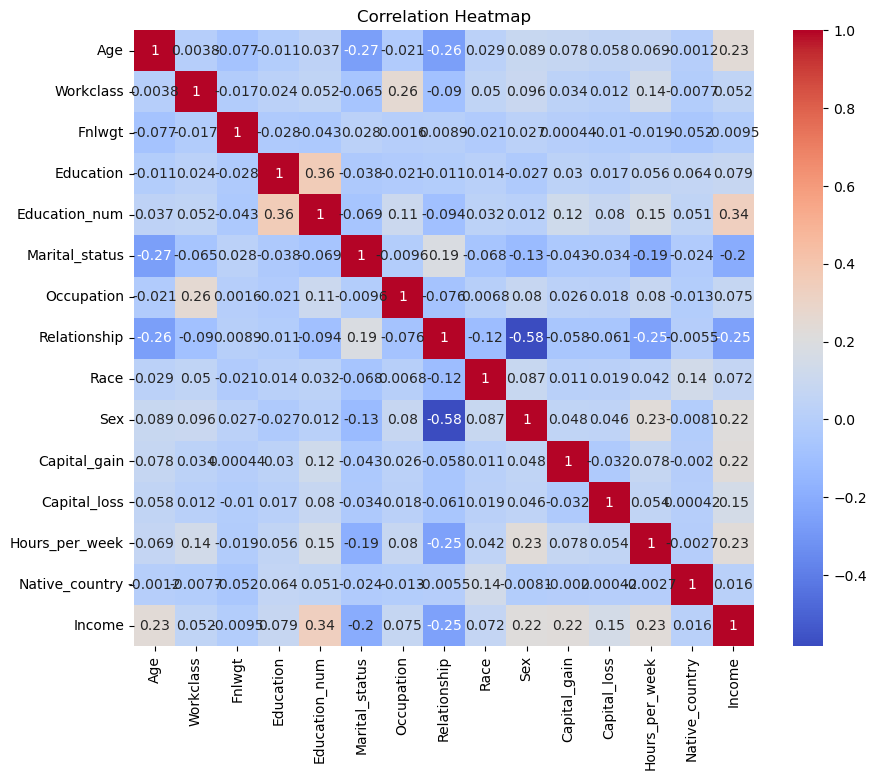

In [31]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:
# Splitting data into features and target variable
X = data.drop("Income", axis=1)
y = data["Income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Model Building
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8524262899262899


In [40]:
# Additional Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512



In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4550  362]
 [ 599 1001]]
